In [180]:
#Importing modules-packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
from google.colab import drive


In [181]:
# Mounting Google Drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
# Reading in the data set
cens = '/content/drive/My Drive/MSBA_Colab_2020/ML_Algorithms/CA03/census_data.csv'
cens = pd.read_csv(cens)




# 2. Data Quality Analysis


In [184]:
# Examining first five rows
cens.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [185]:
# Examining column 'y'
cens.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [186]:
# Count of na values
cens.isna().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [187]:
# Checking data types
cens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [188]:
# Counting Duplicates
cens.duplicated().sum()

40012

## Descriptive Stats by Column

In [189]:
# Hours per Week Stats
print('Value Counts')
print(cens.hours_per_week_bin.sort_index().value_counts())
print()
print('Mode:',cens.hours_per_week_bin.mode())
print()
print('MIN:',cens.hours_per_week_bin.min())
print('MAX:',cens.hours_per_week_bin.max())

Value Counts
b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

Mode: 0    b. 31-40
dtype: object

MIN: a. 0-30
MAX: e. 51-60


In [190]:
# Occupation Column Stats
print('Value Counts')
print(cens.occupation_bin.sort_index().value_counts())
print()
print('Mode:',cens.occupation_bin.mode())
print()
print('MIN:',cens.occupation_bin.min())
print('MAX:',cens.occupation_bin.max())

Value Counts
c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

Mode: 0    c. Mid - Mid
dtype: object

MIN: a. Low
MAX: e. High


In [191]:
# MSR Stats
print('Value Counts')
print(cens.msr_bin.sort_index().value_counts())
print()
print('Mode:',cens.msr_bin.mode())
print()
print('MIN:',cens.msr_bin.min())
print('MAX:',cens.msr_bin.max())

Value Counts
c. High    22047
b. Mid     15868
a. Low     10927
Name: msr_bin, dtype: int64

Mode: 0    c. High
dtype: object

MIN: a. Low
MAX: c. High


In [192]:
# capital_gl_binStats
print('Value Counts')
print(cens.capital_gl_bin.sort_index().value_counts())
print()
print('Mode:',cens.capital_gl_bin.mode())
print()
print('MIN:',cens.capital_gl_bin.min())
print('MAX:', cens.capital_gl_bin.max())

Value Counts
a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

Mode: 0    a. = 0
dtype: object

MIN: a. = 0
MAX: c. > 0


In [193]:
# race_sex_bin Stats
print('Value Counts')
print(cens.race_sex_bin.sort_index().value_counts())
print()
print('Mode:',cens.race_sex_bin.mode())
print()
print('MIN:',cens.race_sex_bin.min())
print('MAX:',cens.race_sex_bin.max())

Value Counts
c. High    29737
b. Mid     16457
a. Low      2648
Name: race_sex_bin, dtype: int64

Mode: 0    c. High
dtype: object

MIN: a. Low
MAX: c. High


In [194]:
# education_bin Stats
print('Value Counts')
print(cens.education_bin.sort_index().value_counts())
print()
print('Mode:',cens.education_bin.mode())
print()
print('MIN:',cens.education_bin.min())
print('MAX:',cens.education_bin.max())

Value Counts
b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High          1428
Name: education_bin, dtype: int64

Mode: 0    b. Mid
dtype: object

MIN: a. Low
MAX: e. High


In [195]:
# age_bin Stats
print('Value Counts')
print(cens.age_bin.sort_index().value_counts())
print()
print('Mode:',cens.age_bin.mode())
print()
print('MIN:',cens.age_bin.min())
print('MAX:', cens.age_bin.max())

Value Counts
e. 40-55             13963
a. 0-25               9627
c. 31-35 & 61-70      9291
d. 36-40 & 56-60      8927
b. 26-30 & 71-100     7034
Name: age_bin, dtype: int64

Mode: 0    e. 40-55
dtype: object

MIN: a. 0-25
MAX: e. 40-55


In [196]:
# Column 'y' Stats
print('Value Counts')
print(cens.y.sort_index().value_counts())
print()
print('Mode:',cens.y.mode())
print()
print('MIN:',cens.y.min())
print('MAX:', cens.y.max())

Value Counts
0    37155
1    11687
Name: y, dtype: int64

Mode: 0    0
dtype: int64

MIN: 0
MAX: 1


## 3. Exploratory Data Analysis

In [197]:
# Isolating y_1 and y_0
cens1 = cens[cens.y ==1]
cens0 = cens[cens.y ==0]


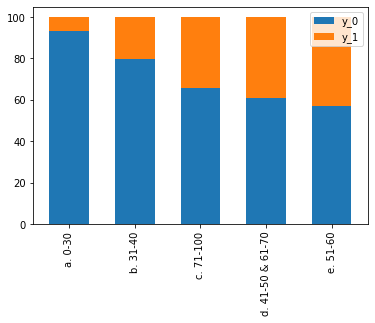

In [198]:
# Creating hours_per_week_bin Graph

# Using Counter to count the number in each bin. Storing the result in a dictionary
hours_dict_0 = dict(Counter(cens0.hours_per_week_bin.to_list()))
hours_dict_1 = dict(Counter(cens1.hours_per_week_bin.to_list()))
  # Creating a Dataframe from the dictionary
hours_week = pd.DataFrame({"0":pd.Series(hours_dict_0),"1":pd.Series(hours_dict_1)})
hours_week
 
hours_week["Total"] = hours_week["0"] + hours_week["1"]
hours_week["y_0"] = hours_week["0"] / hours_week["Total"]*100
hours_week["y_1"] = hours_week["1"] / hours_week["Total"]*100

# Plotting Graph
hours_graph = hours_week[['y_0','y_1']]
hours_graph.plot(kind = 'bar', stacked = True, width = 0.6)
plt.show()


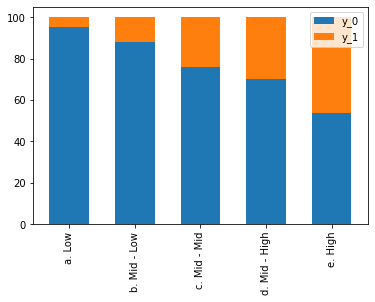

In [199]:
# Creating occuptation_bin Graph

# Using Counter to count the number in each bin. Storing the result in a dictionary
occupation_0 = dict(Counter(cens0.occupation_bin.to_list()))
occupation_1 = dict(Counter(cens1.occupation_bin.to_list()))
  # Creating a Dataframe from the dictionary
occupation_df = pd.DataFrame({"0":pd.Series(occupation_0),"1":pd.Series(occupation_1)})
occupation_df
 
occupation_df["Total"] = occupation_df["0"] + occupation_df["1"]
occupation_df["y_0"] = occupation_df["0"] / occupation_df["Total"]*100
occupation_df["y_1"] = occupation_df["1"] / occupation_df["Total"]*100

# Plotting Graph
occupation_graph = occupation_df[['y_0','y_1']]
occupation_graph.plot(kind = 'bar', stacked = True, width = 0.6)
plt.show()


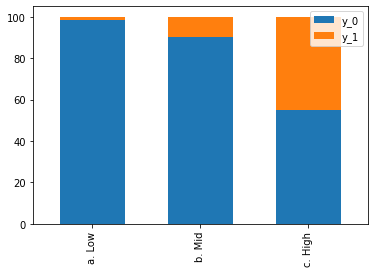

In [200]:
# Creating msr_bin Graph

# Using Counter to count the number in each bin. Storing the result in a dictionary
msr_0 = dict(Counter(cens0.msr_bin.to_list()))
msr_1 = dict(Counter(cens1.msr_bin.to_list()))
  # Creating a Dataframe from the dictionary
msr_df = pd.DataFrame({"0":pd.Series(msr_0),"1":pd.Series(msr_1)})

 
msr_df["Total"] = msr_df["0"] + msr_df["1"]
msr_df["y_0"] = msr_df["0"] / msr_df["Total"]*100
msr_df["y_1"] = msr_df["1"] / msr_df["Total"]*100

# Plotting Graph
msr_graph = msr_df[['y_0','y_1']]
msr_graph.plot(kind = 'bar', stacked = True, width = 0.6)
plt.show()


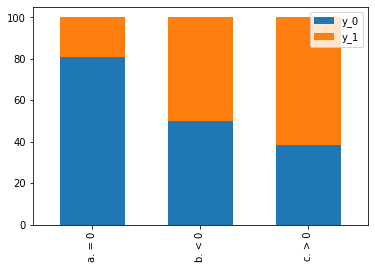

In [201]:
# Creating capital_gains Graph

# Using Counter to count the number in each bin. Storing the result in a dictionary
capitalgl_0 = dict(Counter(cens0.capital_gl_bin.to_list()))
capitalgl_1 = dict(Counter(cens1.capital_gl_bin.to_list()))
  # Creating a Dataframe from the dictionary
capitalgl_df = pd.DataFrame({"0":pd.Series(capitalgl_0),"1":pd.Series(capitalgl_1)})

 
capitalgl_df["Total"] = capitalgl_df["0"] + capitalgl_df["1"]
capitalgl_df["y_0"] = capitalgl_df["0"] / capitalgl_df["Total"]*100
capitalgl_df["y_1"] = capitalgl_df["1"] / capitalgl_df["Total"]*100

# Plotting Graph
capitalgl_graph = capitalgl_df[['y_0','y_1']]
capitalgl_graph.plot(kind = 'bar', stacked = True, width = 0.6)
plt.show()

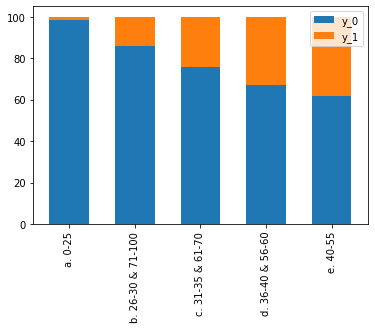

In [202]:
# Creating Age Graph

# Using Counter to count the number in each bin. Storing the result in a dictionary
age_0 = dict(Counter(cens0.age_bin.to_list()))
age_1 = dict(Counter(cens1.age_bin.to_list()))
  # Creating a Dataframe from the dictionary
age_df = pd.DataFrame({"0":pd.Series(age_0),"1":pd.Series(age_1)})

 
age_df["Total"] = age_df["0"] + age_df["1"]
age_df["y_0"] = age_df["0"] / age_df["Total"]*100
age_df["y_1"] = age_df["1"] / age_df["Total"]*100

# Plotting Graph
age_graph = age_df[['y_0','y_1']]
age_graph.plot(kind = 'bar', stacked = True, width = 0.6)
plt.show()

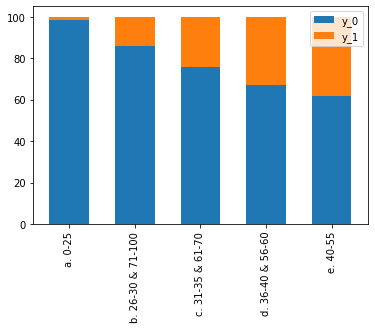

In [203]:
# Creating Education Graph

# Using Counter to count the number in each bin. Storing the result in a dictionary
education_0 = dict(Counter(cens0.education_bin.to_list()))
education_1 = dict(Counter(cens1.education_bin.to_list()))
  # Creating a Dataframe from the dictionary
education_df = pd.DataFrame({"0":pd.Series(age_0),"1":pd.Series(age_1)})

 
education_df["Total"] = education_df["0"] + education_df["1"]
education_df["y_0"] = education_df["0"] / education_df["Total"]*100
education_df["y_1"] = education_df["1"] / education_df["Total"]*100

# Plotting Graph
education_graph = education_df[['y_0','y_1']]
education_graph.plot(kind = 'bar', stacked = True, width = 0.6)
plt.show()

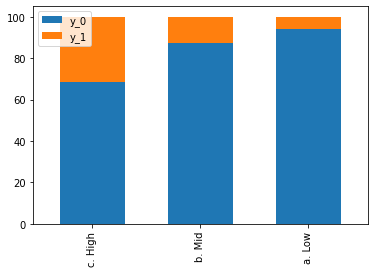

In [204]:
# Creating race_sex Graph

# Using Counter to count the number in each bin. Storing the result in a dictionary
race_sex_0 = dict(Counter(cens0.race_sex_bin.to_list()))
race_sex_1 = dict(Counter(cens1.race_sex_bin.to_list()))
  # Creating a Dataframe from the dictionary
race_sex_df = pd.DataFrame({"0":pd.Series(race_sex_0),"1":pd.Series(race_sex_1)})

 
race_sex_df["Total"] = race_sex_df["0"] + race_sex_df["1"]
race_sex_df["y_0"] = race_sex_df["0"] / race_sex_df["Total"]*100
race_sex_df["y_1"] = race_sex_df["1"] / race_sex_df["Total"]*100

# Plotting Graph
race_sex_graph = race_sex_df[['y_0','y_1']]
race_sex_graph.plot(kind = 'bar', stacked = True, width = 0.6)
plt.show()

## 4. Build a Decision Tree Clasifier Model





In [205]:
# Understand how many unique groups there are in each column:

# Hours per week:           5 splits
# occupation:               5 splits
# msr:                      3 splits
# Capital gain or loss:     3 splits
# race/sex:                 3 splits
# education:                5 splits
# age:                      5 splits

In [206]:
# Creating new data set with dummy variables
cens_dummy = cens
cens_dummy.replace(regex={r'[a]. ': 1, r'[b]. ': 2, r'[c].': 3, r'[d]. ': 4, r'[e]. ': 5}, inplace=True)
cens_dummy

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,2,2,2,3,3,3,3,2,4,train,0
1,1,5,3,1,3,3,3,2,5,train,0
2,2,1,2,1,3,2,2,2,4,train,0
3,2,1,3,1,2,1,1,2,5,train,0
4,2,5,3,1,1,3,3,2,2,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,2,5,2,1,2,3,3,2,4,test,0
48838,2,2,1,1,2,2,2,1,3,test,0
48839,4,5,3,1,3,3,3,2,4,test,0
48840,2,2,1,3,3,3,3,2,5,test,0


In [179]:
# Splitting the Data into Testa nd training sets
  # X training data split
x_train = cens_dummy[cens_dummy.flag=='train']
x_train = x_train.iloc[:,0:9]

  # X test data split
x_test =  cens_dummy[cens_dummy.flag=='test']
x_test = x_test.iloc[:,0:9]

  # y test split
y_test = cens_dummy[cens_dummy.flag=='test']
y_test = y_test.iloc[:,10]

  # y train split
y_train = cens_dummy[cens_dummy.flag=='train']
y_train = y_train.iloc[:,10]


Accuracy: 0.8520975370063264
Recall: 0.578263130525221
Precision: 0.7388704318936877
F1 Score: 0.6487747957992999
[[11649  1622]
 [  786  2224]]


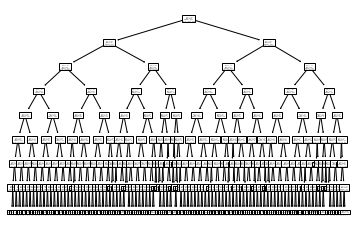

In [178]:
# Creating Function to Run Model
def descision_tree_model(criteria): # Enter 'entropy' or 'gini' to run preferred method
  tree_model =  DecisionTreeClassifier(max_depth=8, 
                                random_state=101,
                                max_features= None, 
                                min_samples_leaf= 2, 
                                min_samples_split=2,
                                criterion=criteria)
  tree_model.fit(x_test, y_test)
  y_pred = tree_model.predict(x_test)
  tree.plot_tree(tree_model)

  # Defining evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  conf_matrix =  confusion_matrix(y_pred, y_test)
  f1_score = 2* ((precision*recall)/(precision + recall))
  print('Accuracy:',accuracy)
  print('Recall:', recall)
  print('Precision:', precision)
  print('F1 Score:', f1_score)
  print(conf_matrix)
  


descision_tree_model('gini')

In [207]:
# Genberating PDF of Decision Tree
import graphviz 
dot_data = tree.export_graphviz(tree_model, out_file=None, filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph.render("census_final_tree") 

'census_final_tree.pdf'

In [208]:
# Creating Function for individual predition
def individual_prediciton(hours,occupation, msr, capital_gain, race_sex, eduction_num, eduction_cat, workclass, age):
 
  df = pd.DataFrame()
  df['hours_per_week_bin'] = [hours]
  df['occupation_bin']  = [occupation]
  df['msr_bin'] = [msr]
  df['capital_gl_bin'] = [capital_gain]
  df['race_sex_bin'] = [race_sex]
  df['education_num_bin'] = [eduction_num]
  df['education_bin'] = [eduction_cat]
  df['workclass_bin'] = [workclass]
  df['age_bin'] = [age]
  return tree_model.predict(df)

individual_prediciton(4,2,3,3,2,2,5,4,4)

array([1])